## Handle Categorical Features
### 2. Oridinal Number Encoding

### Grading System
- A - 1
- B - 2 
- C - 3

### Experience of A Batsman
- A - 10 yr  ----> 1
- B - 5 yr  -----> 2 

### Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday


In [1]:
import datetime

In [2]:
today_date = datetime.datetime.today()

In [3]:
today_date

datetime.datetime(2021, 3, 27, 11, 47, 17, 270595)

In [4]:
today_date - datetime.timedelta(2)

datetime.datetime(2021, 3, 25, 11, 47, 17, 270595)

In [5]:
### list comprehension
days = [today_date - datetime.timedelta(x) for x in range(0, 15)]

In [6]:
import pandas as pd

In [7]:
df = pd.DataFrame(days)
df.columns = ["Day"]

In [8]:
df.head()

,Day
0,2021-03-27 11:47:17.270595
1,2021-03-26 11:47:17.270595
2,2021-03-25 11:47:17.270595
3,2021-03-24 11:47:17.270595
4,2021-03-23 11:47:17.270595


In [12]:
df['weekday'] = df["Day"].dt.day_name()

In [13]:
df.head()

,Day,weekday
0,2021-03-27 11:47:17.270595,Saturday
1,2021-03-26 11:47:17.270595,Friday
2,2021-03-25 11:47:17.270595,Thursday
3,2021-03-24 11:47:17.270595,Wednesday
4,2021-03-23 11:47:17.270595,Tuesday


In [19]:
d = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

In [21]:
df['weekday_ordinal'] = df['weekday'].map(d)

In [22]:
df.head()

,Day,weekday,weekday_ordinal
0,2021-03-27 11:47:17.270595,Saturday,6
1,2021-03-26 11:47:17.270595,Friday,5
2,2021-03-25 11:47:17.270595,Thursday,4
3,2021-03-24 11:47:17.270595,Wednesday,3
4,2021-03-23 11:47:17.270595,Tuesday,2


### 3. Count Or Frequency Encoding

In [30]:
train_set = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header=None, index_col=None)

In [31]:
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [44]:
columns = [1, 3, 5, 6, 7, 8, 9, 13]

In [45]:
columns = [c for c in train_set[columns] if train_set[c].dtype=='O']

In [56]:
df = train_set[columns]

In [57]:
len(df.columns)

8

In [58]:
df.columns = ["Employement", "Degree", "Status", "Designation", "family_job", "Race", "Sex", "Country"]

In [59]:
df.head()

,Employement,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [63]:
for c in df.columns:
    print("Unique Categories in {} is {} labels".format(c, len(df[c].unique())))

Unique Categories in Employement is 9 labels
Unique Categories in Degree is 16 labels
Unique Categories in Status is 7 labels
Unique Categories in Designation is 15 labels
Unique Categories in family_job is 6 labels
Unique Categories in Race is 5 labels
Unique Categories in Sex is 2 labels
Unique Categories in Country is 42 labels


In [66]:
country_map = df.Country.value_counts().to_dict()

In [69]:
df.Country = df.Country.map(country_map)

C:\Users\jgaur\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weights : str or ndarray-like, optional


In [70]:
df.head()

,Employement,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95


### Advantages:
- Easy to Use
- We are not increasing any featrue space

### Disadvantages:
- if the frequency of two categories are same, it will provide the same weight

### 4. Target Guided Ordinal Encoding
- Ordering the labels according to the target
- Replace the labels by the joint probablity of being 1 or 0

In [71]:
 import pandas as pd

In [84]:
df = pd.read_csv('titanic.csv', usecols=['cabin', 'survived'])

In [85]:
df.tail()

,cabin,survived
845,C39,0
846,B37,0
847,NaN,1
848,NaN,0
849,NaN,0


In [86]:
df.cabin.fillna('Missing', inplace=True)

In [87]:
df.head()

,cabin,survived
0,Missing,1
1,Missing,0
2,Missing,0
3,Missing,1
4,Missing,0


In [88]:
df['cabin'] = df.cabin.astype(str).str[0]

In [89]:
df.head()

,cabin,survived
0,M,1
1,M,0
2,M,0
3,M,1
4,M,0


In [90]:
df.cabin.unique()

array(['M', 'C', 'D', 'E', 'B', 'F', 'A', 'G', 'T'], dtype=object)

In [106]:
df.groupby(['cabin'])['survived'].mean().sort_values().index

Index(['T', 'M', 'G', 'C', 'A', 'F', 'D', 'B', 'E'], dtype='object', name='cabin')

<AxesSubplot:ylabel='cabin'>

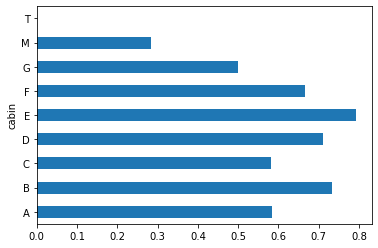

In [103]:
df.groupby(['cabin'])['survived'].mean().plot(kind='barh')

In [107]:
ordinal_labels = df.groupby(['cabin'])['survived'].mean().sort_values().index

In [116]:
ordinal_labels_2 = {k:i for i, k in enumerate(ordinal_labels, 0)}

In [117]:
ordinal_labels_2

{'T': 0, 'M': 1, 'G': 2, 'C': 3, 'A': 4, 'F': 5, 'D': 6, 'B': 7, 'E': 8}

In [118]:
df['cabin_ordinal_labels'] = df['cabin'].map(ordinal_labels_2)

In [119]:
df.head()

,cabin,survived,cabin_ordinal_labels
0,M,1,1
1,M,0,1
2,M,0,1
3,M,1,1
4,M,0,1
